In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/projects/uWF101/"
fil =  "watertofood_uWF-weight_15crops_15countries_1960-2016_5perc.csv"  
df = pd.read_csv(path+fil,) #, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
del df["Unnamed: 0"]
display(df.shape)
df.head()

(10598, 6)

,Years,Item Name,Country Name,Item Category,Weight_t,uWF
0,1961,Apples,Austria,Fruits,456000.0,67.596703
1,1961,Apples,France,Fruits,2141999.0,314.213013
2,1961,Apples,Germany,Fruits,851001.0,147.557999
3,1961,Apples,Greece,Fruits,196000.0,1032.219971
4,1961,Apples,Hungary,Fruits,349500.0,793.695984


In [31]:
#plot settings
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
plt.style.use("fivethirtyeight")

## Rankings:

### 1. Time-average uWF per item (incl. portions)

,uWF,uWF_portion
Item Name,,
Tomatoes,125.215019,12.521502
Lettuce and chicory,156.075839,78.037919
Mushrooms and truffles,158.163595,15.816360
Cucumbers and gherkins,173.623987,5.208720
Carrots and turnips,176.014772,17.601477
"Chillies and peppers, green",182.170456,36.434091
Potatoes,218.411856,21.841186
"Pumpkins, squash and gourds",283.337288,85.001186
Apples,446.832742,89.366548


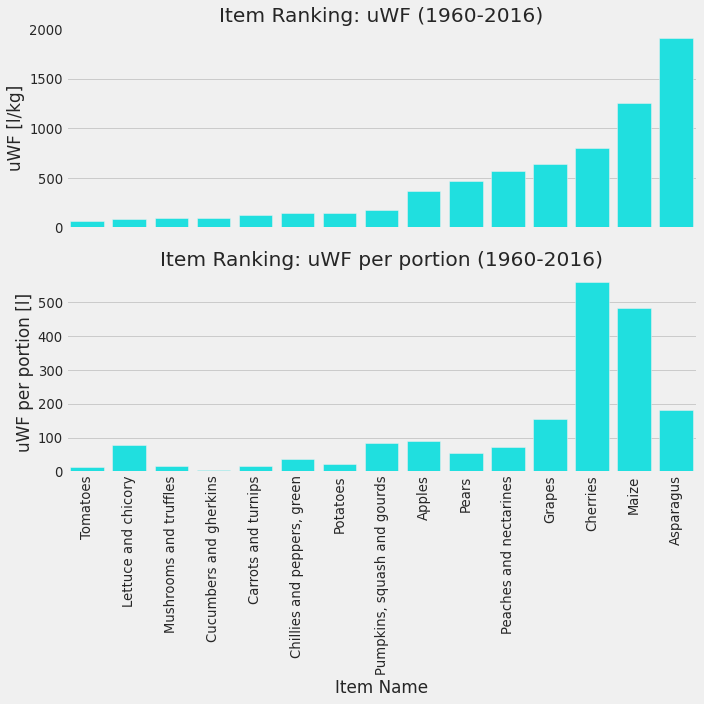

In [54]:
df_r_i = df.loc[:,["Item Name","uWF"]].groupby("Item Name").agg("mean").sort_values("uWF")
fig,ax = plt.subplots(2,figsize=[10,10])
ax[0] = sns.barplot(x=df_r_i.index, y="uWF", data=df_r_i16,color="cyan",ax=ax[0]);
ax[0].set_xticklabels("");
ax[0].set(title="Item Ranking: uWF (1960-2016)",xlabel="",ylabel="uWF [l/kg]")

df_r_i["uWF_portion"]=df_r_i["uWF"]*[0.1,0.5,0.1,0.03,0.1,0.2,0.1,0.3,0.2,0.1,0.1,0.2,0.4,0.3,0.1]
ax[1] = sns.barplot(x=df_r_i.index, y="uWF_portion", data=df_r_i,color="cyan",ax=ax[1]);
ax[1].set_xticklabels(df_r_i.index,rotation=90,);
ax[1].set(title = "Item Ranking: uWF per portion (1960-2016)", ylabel="uWF per portion [l]")
plt.tight_layout()
df_r_i

### 2. uWF per item (incl. portions) in 2016

,uWF,uWF_portion
Item Name,,
Tomatoes,68.395452,6.839545
Cucumbers and gherkins,83.259040,41.629520
Carrots and turnips,97.230101,9.723010
"Chillies and peppers, green",98.200057,2.946002
Lettuce and chicory,125.192501,12.519250
Potatoes,144.675726,28.935145
Mushrooms and truffles,148.780370,14.878037
"Pumpkins, squash and gourds",177.519986,53.255996
Apples,365.470595,73.094119


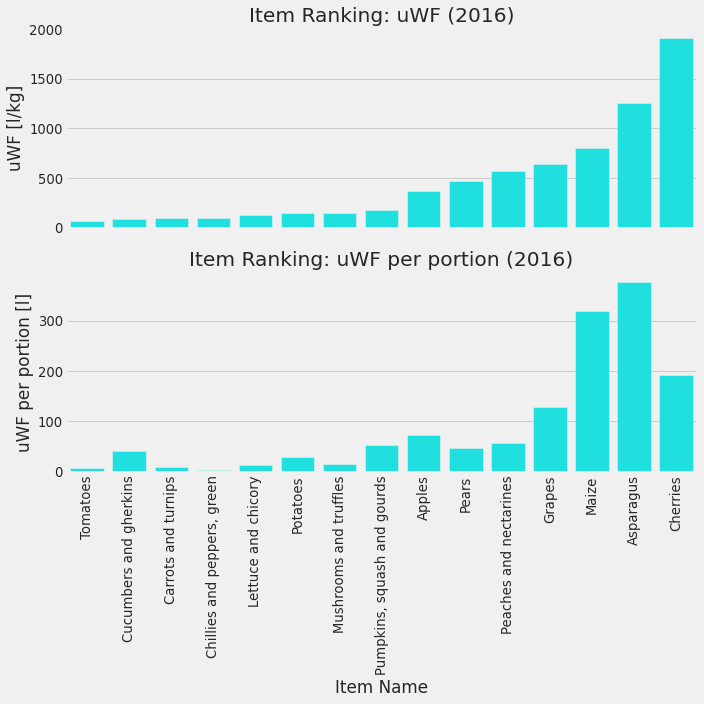

In [53]:
df_r_i16 = df.loc[df["Years"]==2016,["Item Name","uWF"]].groupby("Item Name").agg("mean").sort_values("uWF")
fig,ax = plt.subplots(2,figsize=[10,10])
ax[0] = sns.barplot(x=df_r_i16.index, y="uWF", data=df_r_i16,color="cyan",ax=ax[0]);
ax[0].set_xticklabels("");
ax[0].set(title="Item Ranking: uWF (2016)",xlabel="",ylabel="uWF [l/kg]")

df_r_i16["uWF_portion"]=df_r_i16["uWF"]*[0.1,0.5,0.1,0.03,0.1,0.2,0.1,0.3,0.2,0.1,0.1,0.2,0.4,0.3,0.1]
ax[1] = sns.barplot(x=df_r_i16.index, y="uWF_portion", data=df_r_i16,color="cyan",ax=ax[1]);
ax[1].set_xticklabels(df_r_i16.index,rotation=90,);
ax[1].set(title = "Item Ranking: uWF per portion (2016)", ylabel="uWF per portion [l]")
plt.tight_layout()
df_r_i16

### 3. Time-average uWF per country

,uWF
Country Name,
Belgium,204.176898
Netherlands,210.944920
Austria,298.117007
Italy,426.101775
France,436.493571
Germany,451.745404
Turkey,459.416443
Poland,476.506138
Greece,558.893227


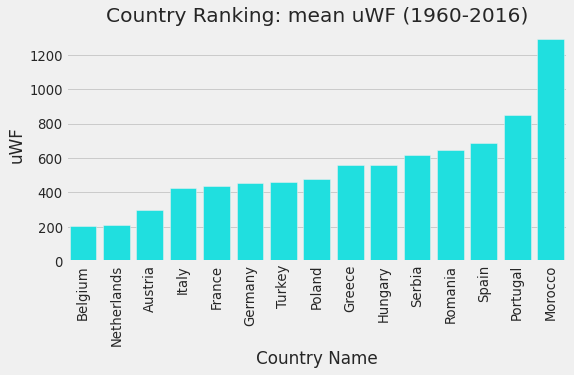

In [56]:
df_r_c = df.loc[:,["Country Name","uWF"]].groupby("Country Name").agg("mean").sort_values("uWF")
fig,ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x=df_r_c.index, y="uWF", data=df_r_c,color="cyan");
ax.set_xticklabels(df_r_c.index,rotation=90);
ax.set_title("Country Ranking: mean uWF (1960-2016)")
df_r_c

### 4. uWF per country in 2016

,uWF
Country Name,
Netherlands,140.467468
Belgium,224.733528
Turkey,288.150380
France,342.681313
Austria,350.913911
Italy,394.936249
Romania,397.469646
Poland,400.341575
Germany,406.704913


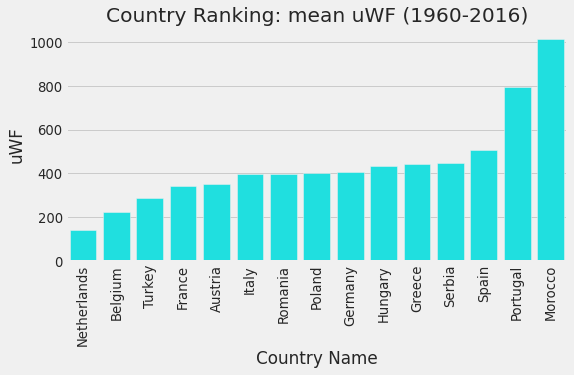

In [55]:
df_r_c16 = df.loc[df["Years"]==2016,["Country Name","uWF"]].groupby("Country Name").agg("mean").sort_values("uWF")
fig,ax = plt.subplots(figsize=[8,4])
ax = sns.barplot(x=df_r_c16.index, y="uWF", data=df_r_c16,color="cyan");
ax.set_xticklabels(df_r_c16.index,rotation=90);
ax.set_title("Country Ranking: mean uWF (1960-2016)")
df_r_c16

### Rankings according to portions

In [57]:
#implemented above
#anything else???